#  Food Marketing Data Analysis

This project explores customer behavior and marketing campaign performance based on demographic and transactional data. The goal is to uncover patterns that can guide future marketing decisions.

## 🎯 Objective

Identify demographic segments with high spending and low campaign engagement.
Explore channel preferences and family structure effects.
Recommend data-driven marketing strategies.

## 📥 Data Loading & Setup
Load data and configure the environment.

In [3]:
import pandas as pd 
food = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Data Analyst Builder\Projects\Food Marketing Data Analysis Project\Data\u_food_marketing.csv')
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',2300)

In [4]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


## 🧹 Data Cleaning
- Handle duplicates and missing values
- Fix data types

In [37]:
food.drop_duplicates(keep = False, inplace = True)

In [38]:
food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis=1)

In [39]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [40]:
food['Marital_Status'] = food[['marital_Divorced','marital_Married', 'marital_Single','marital_Together', 'marital_Widow']].sum(axis=1)

In [31]:
food[food['Marital_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4


In [41]:
food['Marital_Status_str'] = food['Marital_Status'].map({5:'Divorced',4:'Married',3:'Single',2:'Together',1:'Widow'})

In [42]:
food[food['Marital_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married


In [43]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [44]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [45]:
food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis=1)

In [46]:
food[food['Education_Status'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5


In [47]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)

In [53]:
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

## 📊 Exploratory Data Analysis (EDA)
Visual exploration of key features and relationships.

We'll explore spending, campaign response, demographics, and channel preferences.

In [55]:
numeric_columns = food.select_dtypes(include=['number']).columns
food_numeric = food[numeric_columns]
correlation = food_numeric.corr(method='pearson')

if 'Accepted_Campaigns' in correlation.columns:
    # Sort the correlations
    sorted_corr = correlation['Accepted_Campaigns'].sort_values(ascending=False)
    print(sorted_corr)
else:
    print("'Accepted_Campaigns' is not a numeric column or not in the dataset")

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.859712
AcceptedCmp4            0.561592
AcceptedCmp3            0.546838
AcceptedCmp5            0.531799
AcceptedCmp1            0.514231
MntWines                0.461281
MntTotal                0.408568
MntRegularProds         0.408493
Response                0.360220
Income                  0.328398
NumCatalogPurchases     0.320972
MntMeatProducts         0.273522
NumWebPurchases         0.217850
AcceptedCmp2            0.210447
NumStorePurchases       0.194347
MntGoldProds            0.173950
MntSweetProducts        0.146843
MntFishProducts         0.142262
MntFruits               0.136188
Education_Status        0.039102
education_PhD           0.028309
marital_Widow           0.016490
marital_Single          0.010632
Age                     0.005825
education_Graduation    0.003683
marital_Married         0.001860
education_Master        0.000718
marital_Together       -0.005107
Customer_Days          -0.009468
Marital_St

In [54]:
food[food['Accepted_Campaigns'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,1
30,40548.0,0,1,31,110,0,5,2,0,3,2,2,1,4,5,0,1,0,0,0,0,3,11,0,50,2786,0,0,0,2,0,0,0,3,0,0,117,114,1,1,2,Together,3,1
49,82582.0,0,0,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,43,2181,5,0,0,0,0,0,0,3,0,0,1376,1135,2,0,5,Divorced,3,1


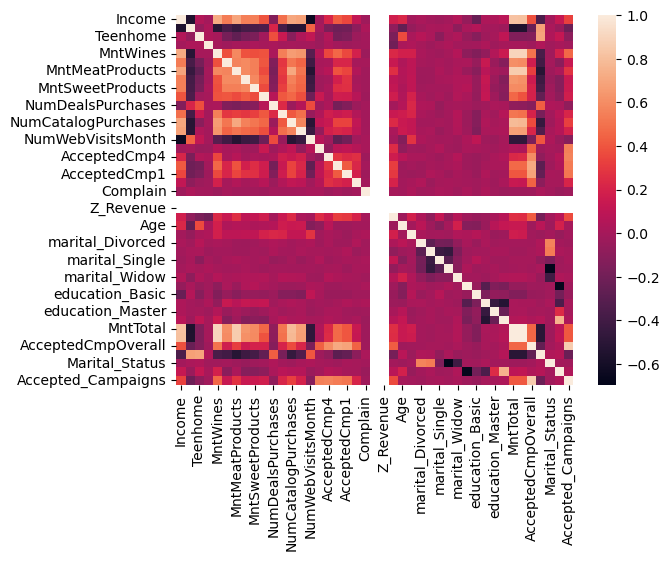

In [57]:
import seaborn as sns
sns.heatmap(correlation)
all_correlations = correlation

<Axes: >

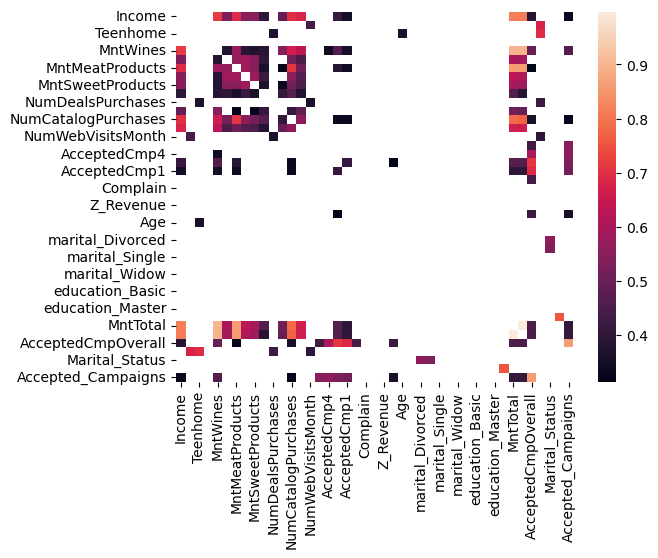

In [58]:
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations <1)]
sns.heatmap(all_correlations)

In [60]:
all_correlations['Accepted_Campaigns']

Income                  0.328398
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.461281
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.320972
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.546838
AcceptedCmp4            0.561592
AcceptedCmp5            0.531799
AcceptedCmp1            0.514231
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.360220
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

In [61]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,0


In [6]:
# Group data by age bins

age_groups = [(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def assign_age_group(Age): 
    for age_range in age_groups: 
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    retrun("Unknown")

food['Age_Group'] = food['Age'].apply(assign_age_group)

In [65]:
food[['Age','Age_Group']].head()

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


In [66]:
import seaborn as sns

<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

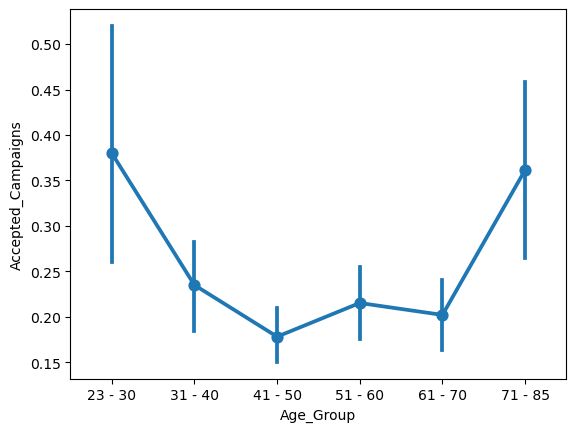

In [67]:
age_order = ['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']
sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)

In [69]:
counts = food['Age_Group'].value_counts()

In [70]:
percentage = counts/food.shape[0]

In [72]:
percent_food = percentage.reset_index()

In [73]:
percent_food.columns = ['age_group', 'percentage']

In [75]:
percent_food = percent_food.sort_values('age_group')

In [76]:
percent_food

,age_group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


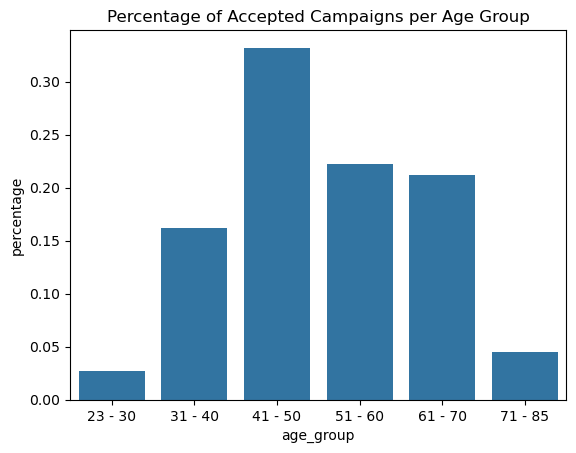

In [78]:
import matplotlib.pyplot as plt
sns.barplot(x='age_group', y='percentage', data = percent_food)
plt.title ('Percentage of Accepted Campaigns per Age Group')
plt.show()

As shown, people aged 30–70 spend more overall, but show lower campaign acceptance.

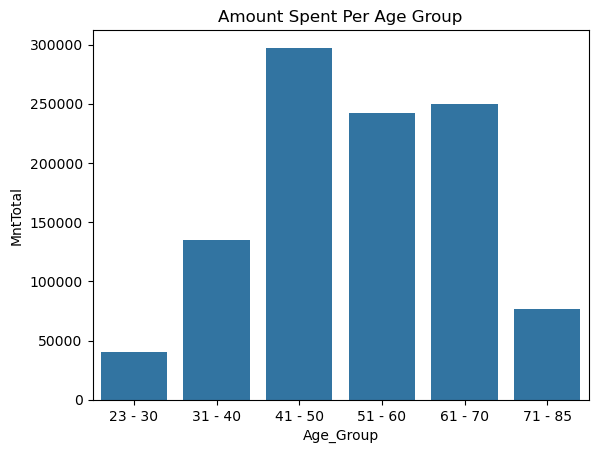

In [84]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food)
plt.title ('Amount Spent Per Age Group')
plt.show()


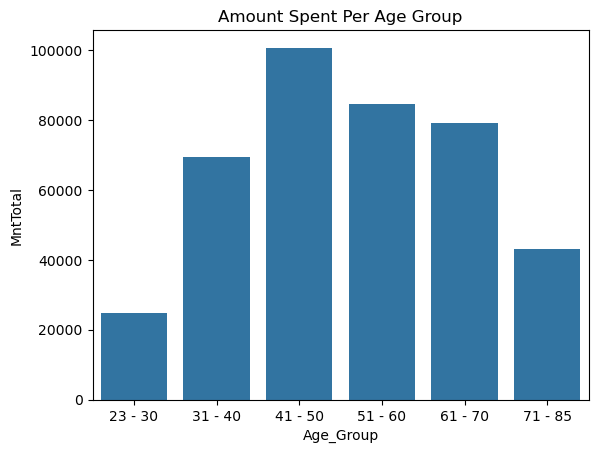

In [85]:
acct_camp = food[food['Accepted_Campaigns'] !=0]
grouped_food = acct_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food)
plt.title ('Amount Spent Per Age Group')
plt.show()

## 🧭 Let's Explore Purchase Channel Preferences Among Campaign Responders


In [86]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,0,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,0,31 - 40


In [90]:
sum_food = pd.DataFrame(food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(),columns = ['Sums'])

In [91]:
sum_food = sum_food.reset_index()

In [95]:
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)

In [96]:
sum_food

,Type_of_Purchase,Sums
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


<Axes: xlabel='Type_of_Purchase', ylabel='Sums'>

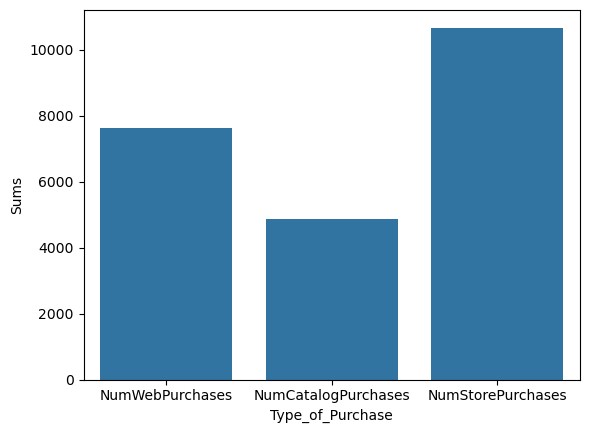

In [97]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = sum_food)

<Axes: xlabel='Type_of_Purchase', ylabel='Sums'>

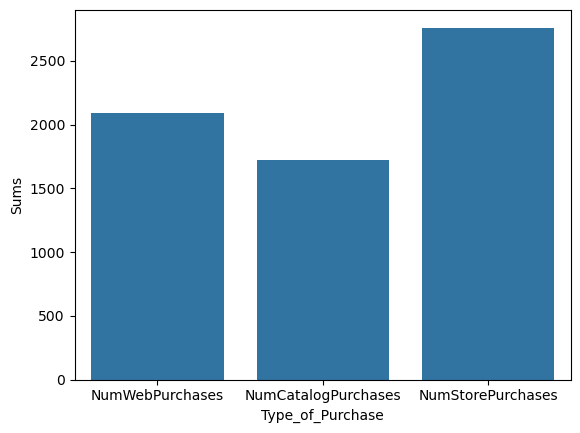

In [98]:
acct_camp = food[food['Accepted_Campaigns'] !=0]
sum_food = pd.DataFrame(acct_camp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(),columns = ['Sums'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index':'Type_of_Purchase'}, inplace = True)
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', data = sum_food)


### We observe that Store Purchases is the most common shopping channel among campaign responders. This insight can guide channel prioritization in future campaigns.


In [7]:
## Let's Explore the Relationship between number of children and the total amount spent
sns.regplot(x= 'Total_Children', y = 'MntTotal', data = food)

NameError: name 'sns' is not defined

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

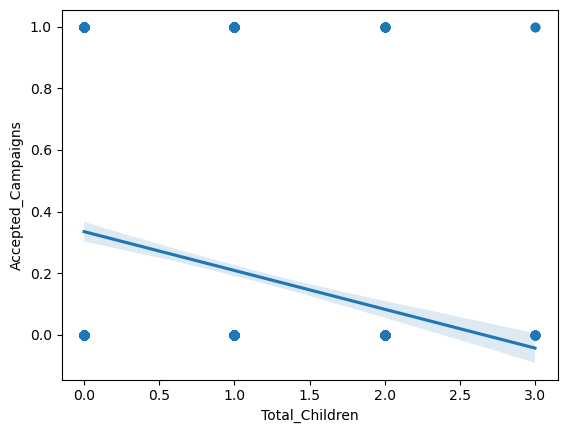

In [102]:
sns.regplot(x= 'Total_Children', y = 'Accepted_Campaigns', data = food)

## The chart above shows a negative correlation between the two variables

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

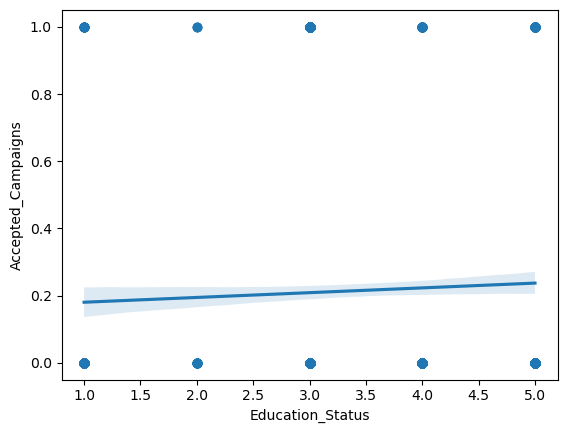

In [103]:
#Exploring the relationship between education and the accepted campaigns

sns.regplot(x= 'Education_Status', y = 'Accepted_Campaigns', data = food)

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

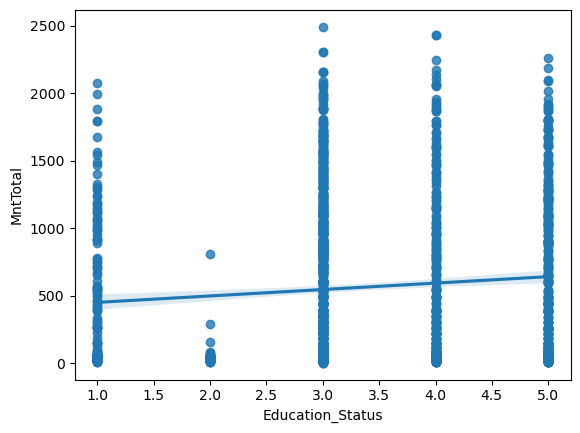

In [104]:
sns.regplot(x= 'Education_Status', y = 'MntTotal', data = food)

<Axes: xlabel='Marital_Status_str', ylabel='count'>

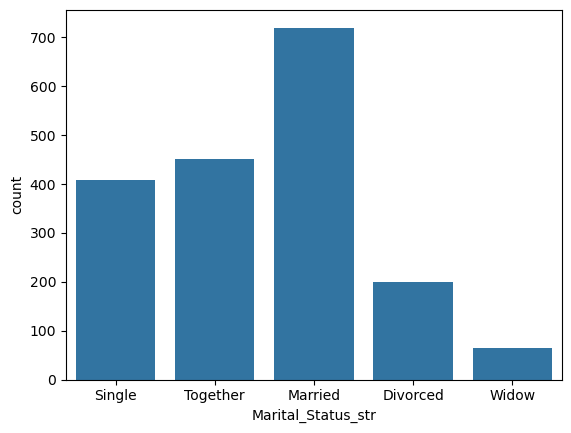

In [106]:
## Relationship between marital status and the amount spent
sns.countplot (x='Marital_Status_str', data = food)

<Axes: xlabel='Marital_Status', ylabel='Accepted_Campaigns'>

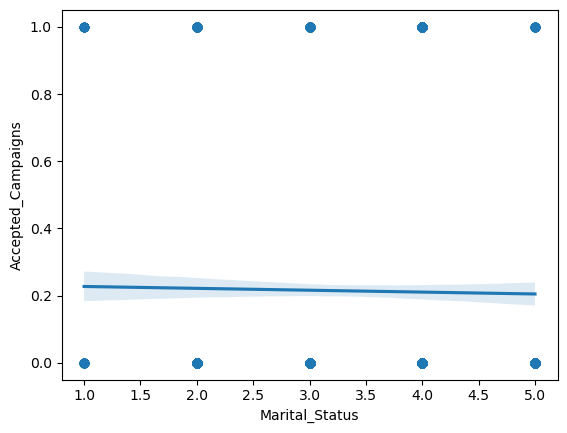

In [109]:
sns.regplot(x= 'Marital_Status', y = 'Accepted_Campaigns', data = food)

In [113]:
rel_food = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

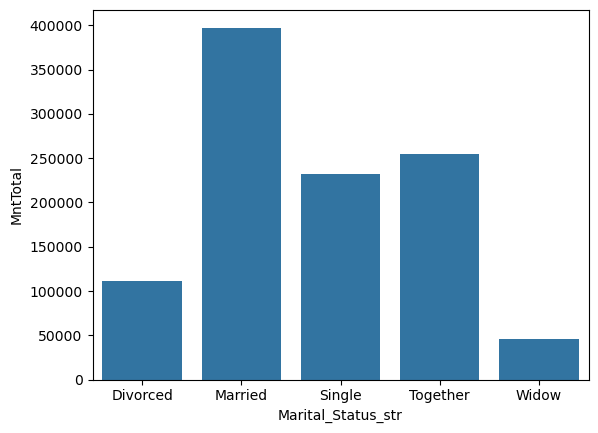

In [115]:
sns.barplot(x = 'Marital_Status_str' ,  y = 'MntTotal', data = rel_food)

In [117]:
total = food['Marital_Status_str'].value_counts()
         
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_Status_str'].value_counts()

In [122]:
pect_marital = accepted / total * 100

pect_food = pect_marital.reset_index()
pect_food.columns = ['Marital_Status', 'Percentage']

<Axes: xlabel='Marital_Status', ylabel='Percentage'>

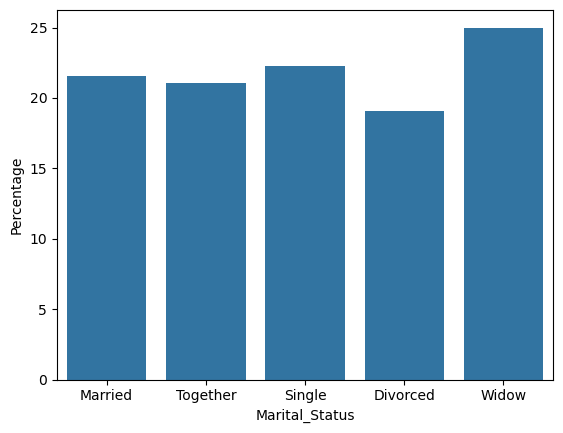

In [123]:
sns.barplot(x='Marital_Status', y = 'Percentage', data = pect_food)

## 🗝️ KEY FINDINGS 
 1. Age - 30-70 were spending more money, but less likely to accept campaigns. Higher volume here though. 
 2. Catalog was more likely to accept campaigns, but in person spend more. Recommend a split betweeen all. 
 3. Focus on people with less kids (no kids)
 4. Education - no impact - don't target any group 
 5. Marital Status - doesn't play a big part. Married, single, together, spend more money. 


## 💡 Recommendations
- Focus campaigns on catalog and online customers
- Target no-kid households in the 30–50 age range
- Run A/B tests with different education segments
- Focus on 21-30, 70 and up - who statistically accepted campaigns at a higher rate. 